# Decrase Coficents by Regulariztion

##### Importing Libraries 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

sns.set()

%config InlineBackend.figure_format = 'png' 
%matplotlib inline


In [4]:

trainData = 'C:\\Users\\Galaxy Computers\\Desktop\\train.csv'
testData = 'C:\\Users\\Galaxy Computers\\Desktop\\/test.csv'

train = pd.read_csv(trainData, header=0)
test = pd.read_csv(testData, header=0)

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], 
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [8]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

##### Remove Outliners

In [10]:
all_data['GrLivArea'].describe()

count    2919.000000
mean     1500.759849
std       506.051045
min       334.000000
25%      1126.000000
50%      1444.000000
75%      1743.500000
max      5642.000000
Name: GrLivArea, dtype: float64

In [11]:
a = 1500 + 506*3
print('Outliner Value:',a)

Outliner Value: 3018


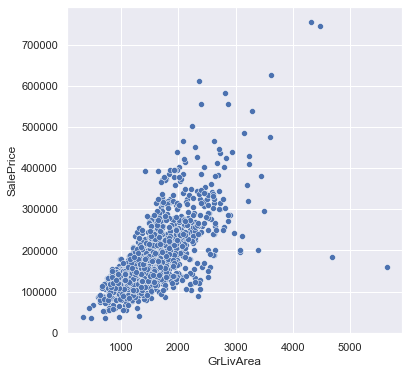

In [12]:

rcParams['figure.figsize'] = (6.0, 6.0) 

sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)

plt.show()

In [13]:
all_data = all_data.drop(all_data[(all_data['GrLivArea']>3200)].index).reset_index(drop=True)

##### Making Numeric as Strings

In [14]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [15]:
all_data.shape

(2883, 79)

##### Categoric Columns doing Numeric 

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [18]:

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

In [19]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,RL,65.0,8450,1,2,3,Lvl,AllPub,Inside,...,0,0,3,4,NaN,0,4,2,WD,Normal
1,5,RL,80.0,9600,1,2,3,Lvl,AllPub,FR2,...,0,0,3,4,NaN,0,7,1,WD,Normal
2,10,RL,68.0,11250,1,2,0,Lvl,AllPub,Inside,...,0,0,3,4,NaN,0,11,2,WD,Normal
3,11,RL,60.0,9550,1,2,0,Lvl,AllPub,Corner,...,0,0,3,4,NaN,0,4,0,WD,Abnorml
4,10,RL,84.0,14260,1,2,0,Lvl,AllPub,FR2,...,0,0,3,4,NaN,0,3,2,WD,Normal


In [20]:
all_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [21]:
all_data.shape

(2883, 79)

In [22]:
all_data = pd.get_dummies(all_data)

In [23]:
all_data.shape

(2883, 219)

In [24]:
all_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=219)

##### Normalization

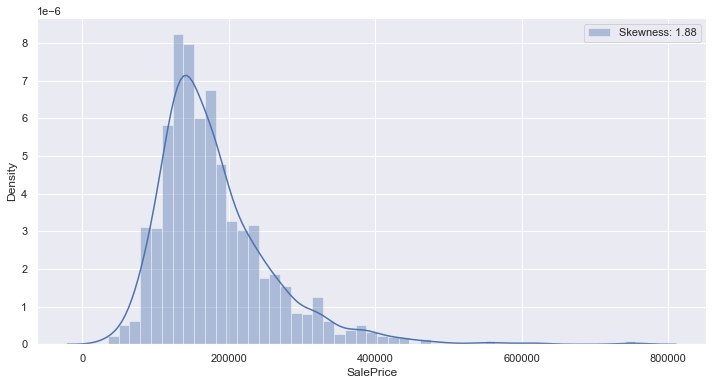

In [25]:
from scipy.stats import skew


rcParams['figure.figsize'] = (12.0, 6.0)

g = sns.distplot(train["SalePrice"], label="Skewness: %.2f"%(train["SalePrice"].skew()))

g = g.legend(loc="best")

plt.show()

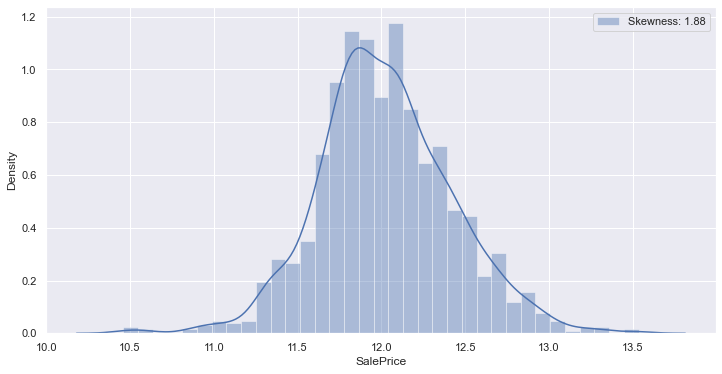

In [26]:
normalizedSalePrice = np.log1p(train["SalePrice"])


rcParams['figure.figsize'] = (12.0, 6.0) 

g = sns.distplot(normalizedSalePrice, label="Skewness: %.2f"%(train["SalePrice"].skew()))

g = g.legend(loc="best")

plt.show()

In [27]:
train["SalePrice"] = np.log1p(train["SalePrice"])

##### Handling Missing Data

In [28]:
all_data.isnull().any().any()

True

In [29]:
all_data = all_data.fillna(all_data.mean())

In [30]:
all_data.isnull().any().any()

False

##### Model Matrices

In [31]:
X_train = all_data[:train.shape[0]]

X_test = all_data[train.shape[0]:]

y = train.SalePrice

In [32]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,10,65.0,8450,1,2,3,0,7,4,2003,...,0,0,0,1,0,0,0,0,1,0
1,5,80.0,9600,1,2,3,0,6,7,1976,...,0,0,0,1,0,0,0,0,1,0
2,10,68.0,11250,1,2,0,0,7,4,2001,...,0,0,0,1,0,0,0,0,1,0
3,11,60.0,9550,1,2,0,0,7,4,1915,...,0,0,0,1,1,0,0,0,0,0
4,10,84.0,14260,1,2,0,0,8,4,2000,...,0,0,0,1,0,0,0,0,1,0


In [33]:
X_train.shape

(1460, 219)

### Lineer Regresyon

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
def rmse_cv(model, cv=5):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring='neg_mean_squared_error', cv=cv))
    return rmse

In [37]:
from sklearn.linear_model import LinearRegression

linearModel = LinearRegression()

rmse = rmse_cv(linearModel)

print("RMSE mean: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE mean: 0.43983795001730747, std: 0.024017018013886938


In [38]:
linearModel.fit(X_train, y)

LinearRegression()

In [39]:
weights = linearModel.coef_

print(weights)

[ 1.72533031e-02 -1.25104700e-04 -1.44096138e-06 -3.64406884e-01
  5.47016125e-02  8.83777617e-03  1.13945604e-01  1.62000958e-02
  4.10906607e-02  3.97893361e-04  8.87072232e-04  8.26117940e-05
  4.73370899e-02  4.41560862e-02 -1.48671067e-02 -1.50249421e-02
 -1.65026331e-02  7.52760261e-03  1.59576315e-05 -1.14655332e-02
 -8.84961211e-05  4.06164711e-05 -3.19219787e-05 -1.08374703e-02
 -6.25807777e-02 -6.90904525e-05 -1.01789036e-04  2.43861866e-04
  7.29827774e-05  1.25885083e-02 -6.33461216e-02  3.24170743e-02
 -7.67791425e-02  1.55845824e-02 -4.68594812e-02  8.76053932e-03
 -3.58726049e-04 -1.36982408e-02 -3.71389481e-02 -1.16945828e-02
  4.11214372e-05 -2.47334913e-03 -4.00809706e-02  1.91473388e-04
 -3.94820716e-02  1.97936112e-02  3.19823345e-02 -5.15259541e-05
  4.25552761e-04 -8.71757204e-05  4.87202846e-04  3.14708707e-04
  1.50040536e-04  1.51045466e-01 -3.52217952e-03  9.33564016e-05
 -2.79142293e-05 -1.07548912e-02 -3.73764758e-02  6.53255674e-02
  1.57300360e-01 -6.14099

In [45]:

print("Number of columns:",weights.shape)

Number of columns: (219,)


In [46]:
coef = pd.Series(weights, index = X_train.columns)

imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

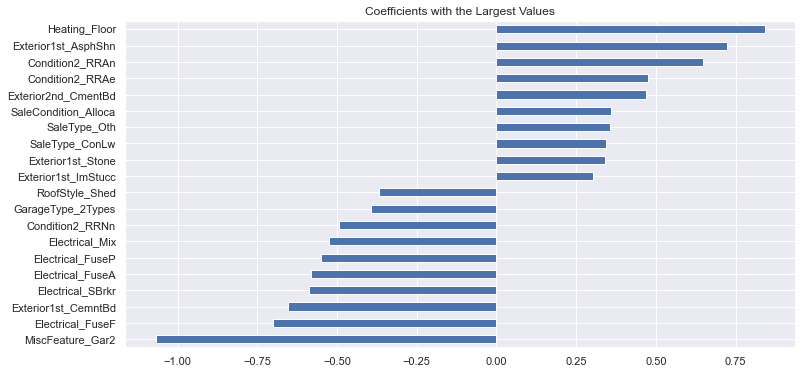

In [48]:
imp_coef.plot(kind = "barh")

plt.title("Coefficients with the Largest Values")

plt.show()

##### Ridge Regression (L2-Regularization)

In [50]:
from sklearn.linear_model import Ridge
ridgeModel = Ridge(alpha = 0.1)

rmse = rmse_cv(ridgeModel)

print("RMSE mean: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE mean: 0.4364150852898221, std: 0.022834626257175826


* Linear Regression -> RMSE = 0.0.439
* Ridge Regression -> RMSE = 0.436

In [51]:
ridgeModel.fit(X_train, y)

Ridge(alpha=0.1)

In [52]:
coef_ridge = pd.Series(ridgeModel.coef_, index = X_train.columns)

imp_coef_ridge = pd.concat([coef_ridge.sort_values().head(10), coef_ridge.sort_values().tail(10)])

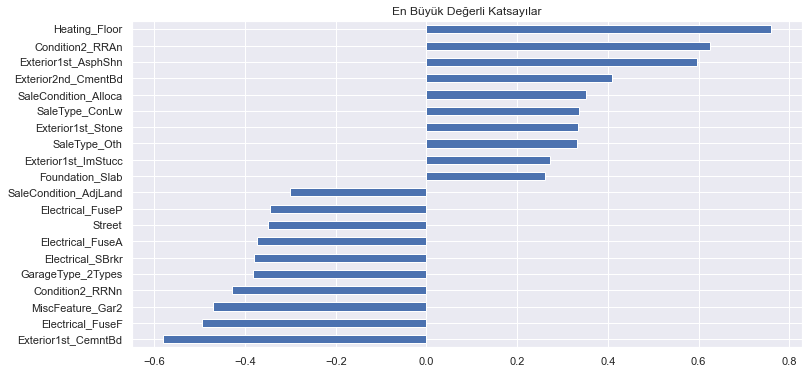

In [53]:
imp_coef_ridge.plot(kind = "barh")

plt.title("En Büyük Değerli Katsayılar")

plt.show()

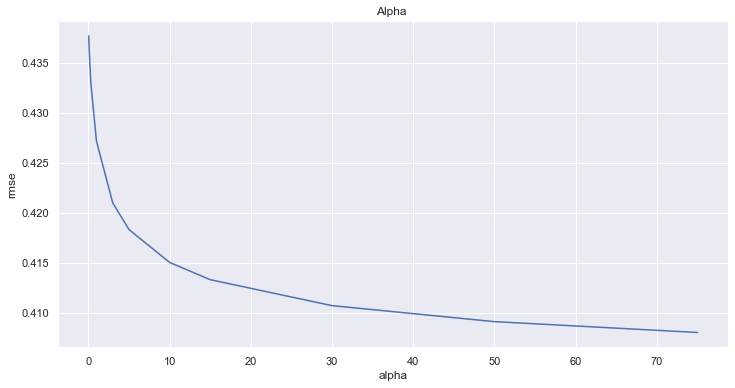

In [54]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)

cv_ridge.plot(title = "Alpha ")

plt.xlabel("alpha")
plt.ylabel("rmse")

plt.show()

In [55]:
optimalRidgeAlpha = cv_ridge[cv_ridge == cv_ridge.min()].index.values[0]

print("Optimal Ridge Alpha value: {}".format(optimalRidgeAlpha))

Optimal Ridge Alpha value: 75.0


In [56]:
ridgeModel = Ridge(alpha = optimalRidgeAlpha)

rmse = rmse_cv(ridgeModel)

print("RMSE Ortalaması: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE Ortalaması: 0.4080870838882218, std: 0.017710480390670216


In [57]:
ridgeModel.fit(X_train, y)

Ridge(alpha=75.0)

In [58]:
coef_ridge = pd.Series(ridgeModel.coef_, index = X_train.columns)

imp_coef_ridge = pd.concat([coef_ridge.sort_values().head(10), coef_ridge.sort_values().tail(75)])

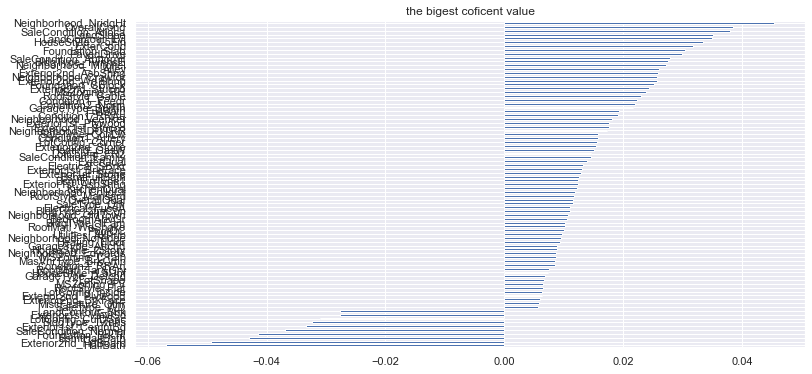

In [59]:

imp_coef_ridge.plot(kind = "barh")

plt.title("the bigest coficent value")

plt.show()

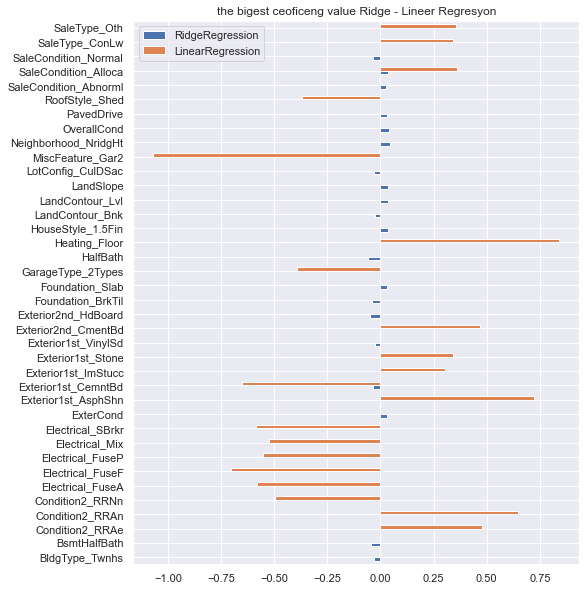

In [60]:
ridge_coef = pd.Series(ridgeModel.coef_, index = X_train.columns)
ridge_imp_coef = pd.concat([ridge_coef.sort_values().head(10), ridge_coef.sort_values().tail(10)])

rcParams['figure.figsize'] = (8.0, 10.0) # grafiğin boyutu

df = pd.DataFrame({ "RidgeRegression" : ridge_imp_coef, "LinearRegression" : imp_coef })

df.plot(kind = "barh")
plt.title("the bigest ceoficeng value Ridge - Lineer Regresyon")

plt.show()